##### In this particular Notebook, Unsupervised learning and dimentionality reduction is perfromed using undercomplete autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

In [3]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('crop modified.csv')
df.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [5]:
df2 = df.drop(['label', 'Unnamed: 0'], axis='columns')
df2.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [6]:
# Scale the data so they can be on the same scale all through
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df2)

In [7]:
input_dim = x_scaled.shape[1]
input_dim

7

In [8]:
encoding_dim = 2

AutoEncoder Variant 1

In [11]:
encoder = Sequential([Input(shape=(input_dim,)),
    Dense(5),
    Dense(2)]
    )

decoder = Sequential([Dense(2),
                      Dense(5),
                      Dense(7)])

autoencoder = Sequential([encoder, decoder])


In [12]:
optimizer = keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

In [14]:
history = autoencoder.fit(x_scaled, x_scaled, epochs=100, verbose=False)

In [16]:
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 2)                 52        
                                                                 
 sequential_7 (Sequential)   (None, 7)                 63        
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
encoded_data = encoder.predict(x_scaled)
encoded_data

69/69 [==============================] - 1s 3ms/step


array([[0.35467115, 1.0969458 ],
       [0.27785757, 1.0025615 ],
       [0.41864836, 0.99975574],
       ...,
       [0.874374  , 1.1725596 ],
       [1.0825399 , 0.6133962 ],
       [1.2020818 , 0.6734095 ]], dtype=float32)

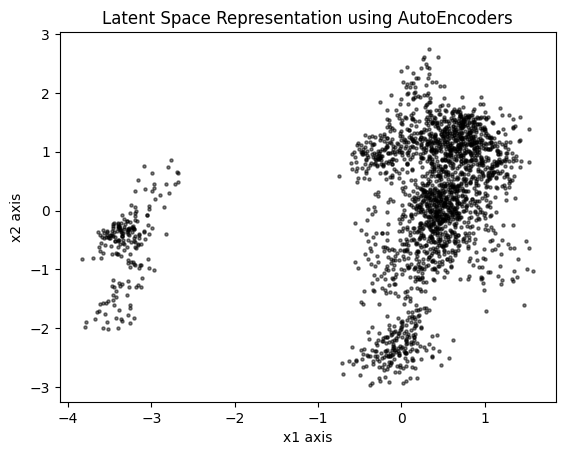

In [32]:
##### Visualizing the Latent Space
plt.title('Latent Space Representation using AutoEncoders')
plt.xlabel('x1 axis')
plt.ylabel('x2 axis')
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c='black', alpha=0.5, s=5)
plt.show()

In [22]:
dataframe = pd.DataFrame(encoded_data, columns=['x1', 'x2'])
dataframe

,x1,x2
0,0.354671,1.096946
1,0.277858,1.002561
2,0.418648,0.999756
3,0.675631,1.514594
4,0.618256,1.064463
...,...,...
2195,0.959453,1.204790
2196,1.155503,0.848593
2197,0.874374,1.172560
2198,1.082540,0.613396


In [43]:
dataframe.to_csv('encoded.csv', index=True)

In [23]:
dataframe.corr()

,x1,x2
x1,1.00000,0.31203
x2,0.31203,1.00000


In [45]:
clus_df = pd.read_csv('encoded.csv')
clus_df

,Unnamed: 0,x1,x2
0,0,0.354671,1.096946
1,1,0.277858,1.002562
2,2,0.418648,0.999756
3,3,0.675631,1.514594
4,4,0.618256,1.064463
...,...,...,...
2195,2195,0.959453,1.204791
2196,2196,1.155503,0.848593
2197,2197,0.874374,1.172560
2198,2198,1.082540,0.613396


In [46]:
clus_df2 = clus_df.drop('Unnamed: 0', axis='columns')
clus_df2

,x1,x2
0,0.354671,1.096946
1,0.277858,1.002562
2,0.418648,0.999756
3,0.675631,1.514594
4,0.618256,1.064463
...,...,...
2195,0.959453,1.204791
2196,1.155503,0.848593
2197,0.874374,1.172560
2198,1.082540,0.613396


In [20]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=5)

In [49]:
kmeans.fit(clus_df2)

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [50]:
clusters = kmeans.labels_
clusters

array([2, 2, 2, ..., 2, 4, 4])

In [51]:
clus_df2['Labels'] = clusters
clus_df2

,x1,x2,Labels
0,0.354671,1.096946,2
1,0.277858,1.002562,2
2,0.418648,0.999756,2
3,0.675631,1.514594,2
4,0.618256,1.064463,2
...,...,...,...
2195,0.959453,1.204791,2
2196,1.155503,0.848593,4
2197,0.874374,1.172560,2
2198,1.082540,0.613396,4


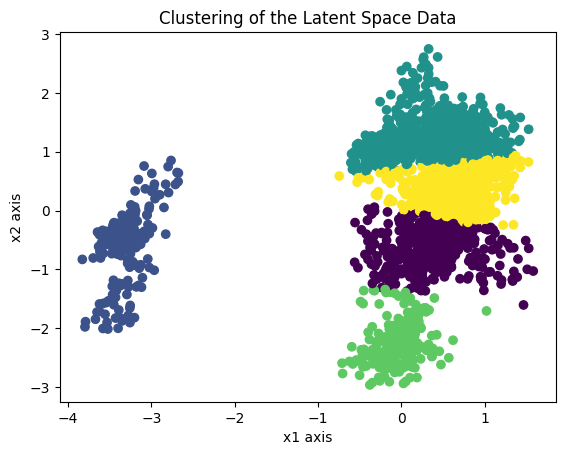

In [53]:
plt.scatter(clus_df2['x1'], clus_df2['x2'], c=clus_df2['Labels'])
plt.xlabel('x1 axis')
plt.ylabel('x2 axis')
plt.title('Clustering of the Latent Space Data')
plt.show()